# One-Sample z-Test

## Introduction

A one-sample *z*-test is the most basic type of hypothesis test. It is performed when the population means and standard deviation are known. This makes the analysis very simple. The main takeaway from this lesson and the next lab is to have an idea around the process of hypothesis testing and understanding test statistics and p-values. 

## Objectives:
You will be able to:

* Explain use cases for a 1-sample z-test
* Set up null and alternative hypotheses
* Use the z-table and scipy methods to acquire the p value for a given z-score
* Calculate and interpret p-value for significance of results

## One-Sample *z*-test

**The one-sample *z*-test is best suited for situations where you want to investigate whether a given "sample" comes from a particular "population".**

The best way to explain how one-sample *z*-tests work is by using an example.

Let's set up a problem scenario (known as a research question or analytical question) and apply a one-sample *z*-test, while explaining all the steps required to call our results "statistically significant".

## The Analytical Question 

A data scientist wants to examine if there is an effect on IQ scores when using tutors. To analyze this, she conducts IQ tests on a sample of 40 students and wants to compare her students' IQ to the general population IQ. The way an IQ score is structured, we know that a standardized IQ test has a mean of 100 and a standard deviation of 16. When she tests her group of students, however, she gets an average IQ of 103. Based on this finding, does tutoring make a difference?

## Step 1: State Your Hypotheses

### The Alternative Hypothesis ($H_a$)

The alternative hypothesis always reflects the idea or theory that needs to be tested. For this problem, you want to test if tutoring has resulted in a significant increase in student IQ. So, you would write it down as:

> The sample mean is **significantly** bigger than the population mean

Again, significance is key here. If we denote the sample mean as $\bar{x}$, and population mean as mu ($\mu$), you can write the alternative hypothesis as:

$$\large H_a\text{:   }\mu < \bar{x}$$

The alternative hypothesis here is that the population mean $\mu$ is less than the sample mean $\bar{x}$. In other situations, you could check for both possibilities of $\mu$ being smaller OR bigger than by checking  $\mu \neq \bar{x}$. 

Maybe the tutoring results in a lower IQ... Who knows!

For now, you'll just check for a **significant increase**, for now, to keep the process simple.

### The Null Hypothesis ($H_0$)

For a one-sample *z*-test, you define your null hypothesis as there being **no significant difference** between the specified sample and population means. In other words, under the null hypothesis, you assume that any observed (generally small) difference between the sample and population means may be present due to sampling or experimental error. Considering this, for this problem, you can define a null hypothesis ($H_0$) as:

> There is **no significant difference** between the sample mean and population mean 

Remember the emphasis is on a _significant_ difference, rather than just any difference as a natural result of taking samples.

Denoting the sample mean as $\bar{x}$, and the population mean as $\mu$, you can write the null hypothesis as:

$$\large H_0\text{:   }\mu \geq \bar{x}$$


## Step 2: Specify a Significance Level (alpha)

Now that your hypotheses are in place, you have to decide on your significance level alpha ($\alpha$) as a cut-off value to define whether you can reject your null hypothesis or not.

As discussed previously, often, $\alpha$ is set to 0.05, which also has as a side-effect that there is a 5 percent chance that you will reject the null hypothesis when it is true.

Later, you'll see that using $\alpha$, you'll formulate your test result as: "with a confidence level of 95%, we can state that...". For a *z*-distribution, this can be shown as below:

<img src="images/hypothesis_test.png" width=670>

If you test both sides of the distribution ($\mu \neq \bar{x}$, when $\mu$ can either be smaller OR bigger), you need to perform a two-tail test to see if tutoring results in lower OR higher IQs.

Each purple region would be calculated as $\dfrac{\alpha}{2}$. When testing a single side (as in the example) i.e. just higher OR just lower, you can use a one-tail test as shown in the first and second images. The $\alpha$ value we use is 0.05 or $5\%$.

## Step 3: Calculate the test statistic

For *z*-tests, a *z*-statistic is used as our test statistic. You'll see other test statistics suitable for other tests later. A one-sample *z*-statistic is calculated as:

$$ \large \text{z-statistic} = \dfrac{\bar x - \mu_0}{{\sigma}/{\sqrt{n}}} $$

This formula slightly differs from the standard score formula. It includes the square root of $n$ to reflect that we are dealing with the sample variance here. 

Now, all you need to do is use this formula given your sample mean $\bar x$, the population standard deviation $\sigma$, and the number of items in the sample ($n$). $\mu_0$ is the mean you're testing the hypothesis for, or the "hypothesized mean". 

Let's use Python to calculate this. 

In [1]:
import scipy.stats as stats
from math import sqrt
x_bar = 103 # sample mean 
n = 40 # number of students
sigma = 16 # sd of population
mu = 100 # Population mean 

z = (x_bar - mu)/(sigma/sqrt(n))
z

1.1858541225631423

Let's try to plot this *z*-value on a standard normal distribution to see what it means. 

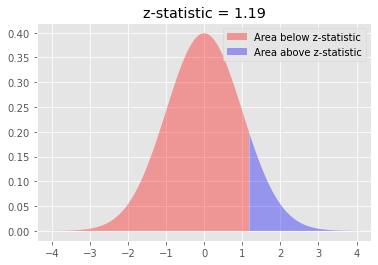

In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


plt.style.use('ggplot')
plt.fill_between(x=np.arange(-4,1.19,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.19,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(1.19,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.19,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 1.19');

## Step 4:  Calculate the p-value

Remember that *z*-values in a standard normal distribution represent standard deviations. Just like before, you need to look up the related probability value in a *z*-table, or use `scipy.stats` to calculate it directly. 
In SciPy, the cumulative probability up to the *z*-value can be calculated as:

In [12]:
stats.norm.cdf(z)

0.8821600432854813

The percent area under the curve from to a *z*-score of 1.19 is 88.2% (using the *z*-table or SciPy calculations), this means that the average intelligence of the tutored set of students is bigger than 88.2% of the population. But with alpha specified as 0.05, we wanted it to be greater than 95% to prove the hypothesis to be significant.

Mathematically, you want to get the p-value, and this can be done by subtracting the *z*-value from 1, since the sum of probabilities is always 1.

In [13]:
pval = 1 - stats.norm.cdf(z)
pval

0.11783995671451875

## Step 5: Interpret p-value

Our p-value (0.12) is larger than the alpha of 0.05. So what does that mean? Can you not conclude that tutoring leads to an IQ increase? 

Well, you still can't really say that for sure. **What we can say is that there is not enough evidence to reject the null hypothesis with the given sample, given an alpha of 0.05.** There are ways to scale experiments up and collect more data or apply sampling techniques to be sure about the real impact. 

And even when the sample data helps to reject the null hypothesis, you still cannot be 100% sure of the outcome. 
What you can say, however, is given the evidence, the results show a significant increase in the IQ as a result of tutoring, instead of saying "tutoring improves IQ".

## Summary 

In this lesson, you learned to run a one-sample *z*-test to compare sample and population where the population mean and standard deviation are known. This is the most basic test in statistics, but in the real world, the true population means and standard deviations are rarely identifiable and you need to work with samples. That's where more advanced tests come in to play, which you will learn about later.